In [10]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#ignore all Depricated Warning
simplefilter(action='ignore', category=DeprecationWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=RuntimeWarning)
import pandas as pd
import io
import numpy as np
import os

In [9]:
train_data = pd.read_csv("F:/Project/application_train.csv")

In [3]:
print('Training data shape: ', train_data.shape)

Training data shape:  (307511, 122)


In [14]:
dum_train = pd.get_dummies(train_data, drop_first=True)
dum1=dum_train.dropna(axis=1)
X = dum1.drop('TARGET',axis=1)
y = dum_train['TARGET']

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

# Default: Tree Classifier
model_rf = BaggingClassifier(random_state=2019,oob_score=True,
                             max_features=X.shape[1],
                             n_estimators=50)

In [17]:
model_rf.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_rf.oob_score_))

y_pred = model_rf.predict(X_test)

Out of Bag Score = 0.9185


In [18]:
y_pred = model_rf.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[84787    19]
 [ 7438    10]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     84806
          1       0.34      0.00      0.00      7448

avg / total       0.87      0.92      0.88     92254

0.9191688165282806


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

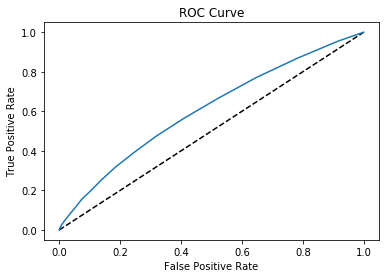

In [22]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [23]:
roc_auc_score(y_test, y_pred_prob)

0.6068956788227066